Cargar los recursos

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()



replicating local resources


Cargar datos


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"santiago887r","key":"b0e51fcda78bbc6c00e00839ee80ec77"}'}

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia


In [5]:
!unzip udea*.zip > /dev/null

In [6]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


In [7]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


In [8]:
z.head()



,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Exploración de datos y analisis de los datos

---



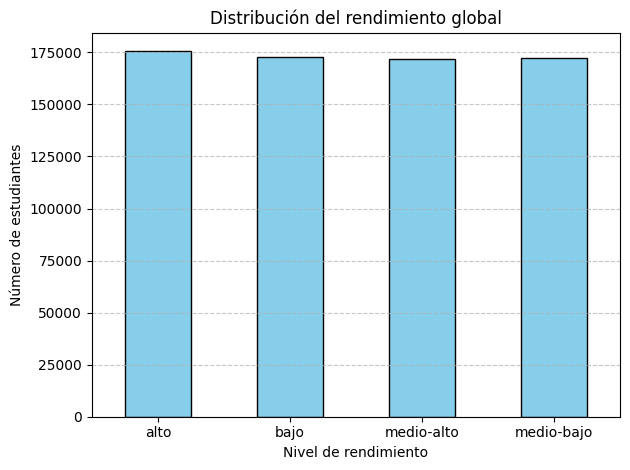

In [9]:
import matplotlib.pyplot as plt

z['RENDIMIENTO_GLOBAL'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución del rendimiento global')
plt.xlabel('Nivel de rendimiento')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
##cuantos estudiantes hay por programa academico##
estudiantes_program = z.groupby('ESTU_PRGM_ACADEMICO').size()
estudiantes_program

,0
ESTU_PRGM_ACADEMICO,
3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,69
ACTIVIDAD FISICA Y DEPORTE,162
ACUICULTURA,79
ADMINISTRACION,117
ADMINISTRACION FINANCIERA,74
...,...
TRABAJO SOCIAL,12686
TRADUCCION INGLES-FRANCES-ESPAÑOL,68
TURISMO,222


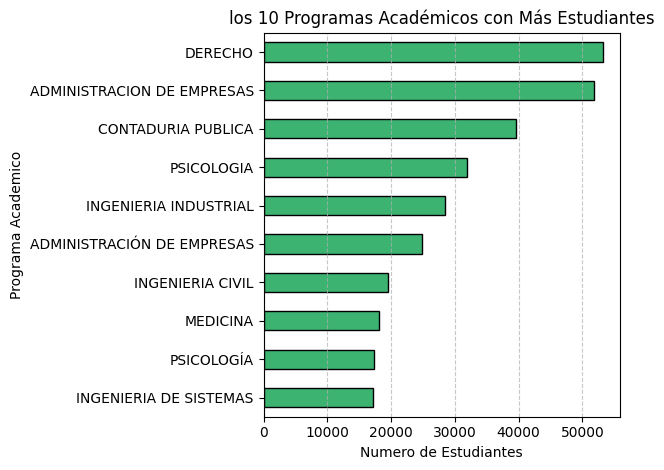

In [12]:
#Para mas orden y mejor visualización se muestran los 10 programas con mas estudiaste


estudiantes_program.sort_values(ascending=False).head(10).plot(kind='barh', color='mediumseagreen', edgecolor='black')
plt.title('los 10 Programas Académicos con Más Estudiantes')
plt.xlabel('Numero de Estudiantes')
plt.ylabel('Programa Academico')
plt.gca().invert_yaxis()  # de esta forma el mas frecuente(oesea el que tiene mas estudiantes quede arriba)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


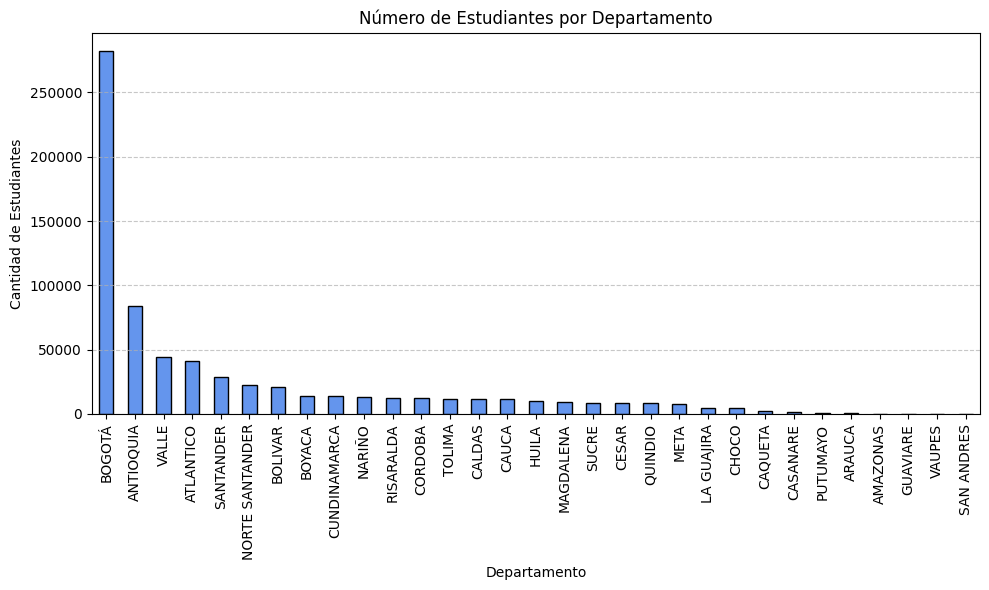

In [13]:
#Cuantos estudiantes hay por departamento#
import matplotlib.pyplot as plt

z['ESTU_PRGM_DEPARTAMENTO'].value_counts().sort_values(ascending=False).plot(
    kind='bar', figsize=(10,6), color='cornflowerblue', edgecolor='black'
)
plt.title('Número de Estudiantes por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


La mayoria de estudiantes se encuentran en bogotá

In [15]:
from rlxutils import subplots
import matplotlib.pyplot as plt

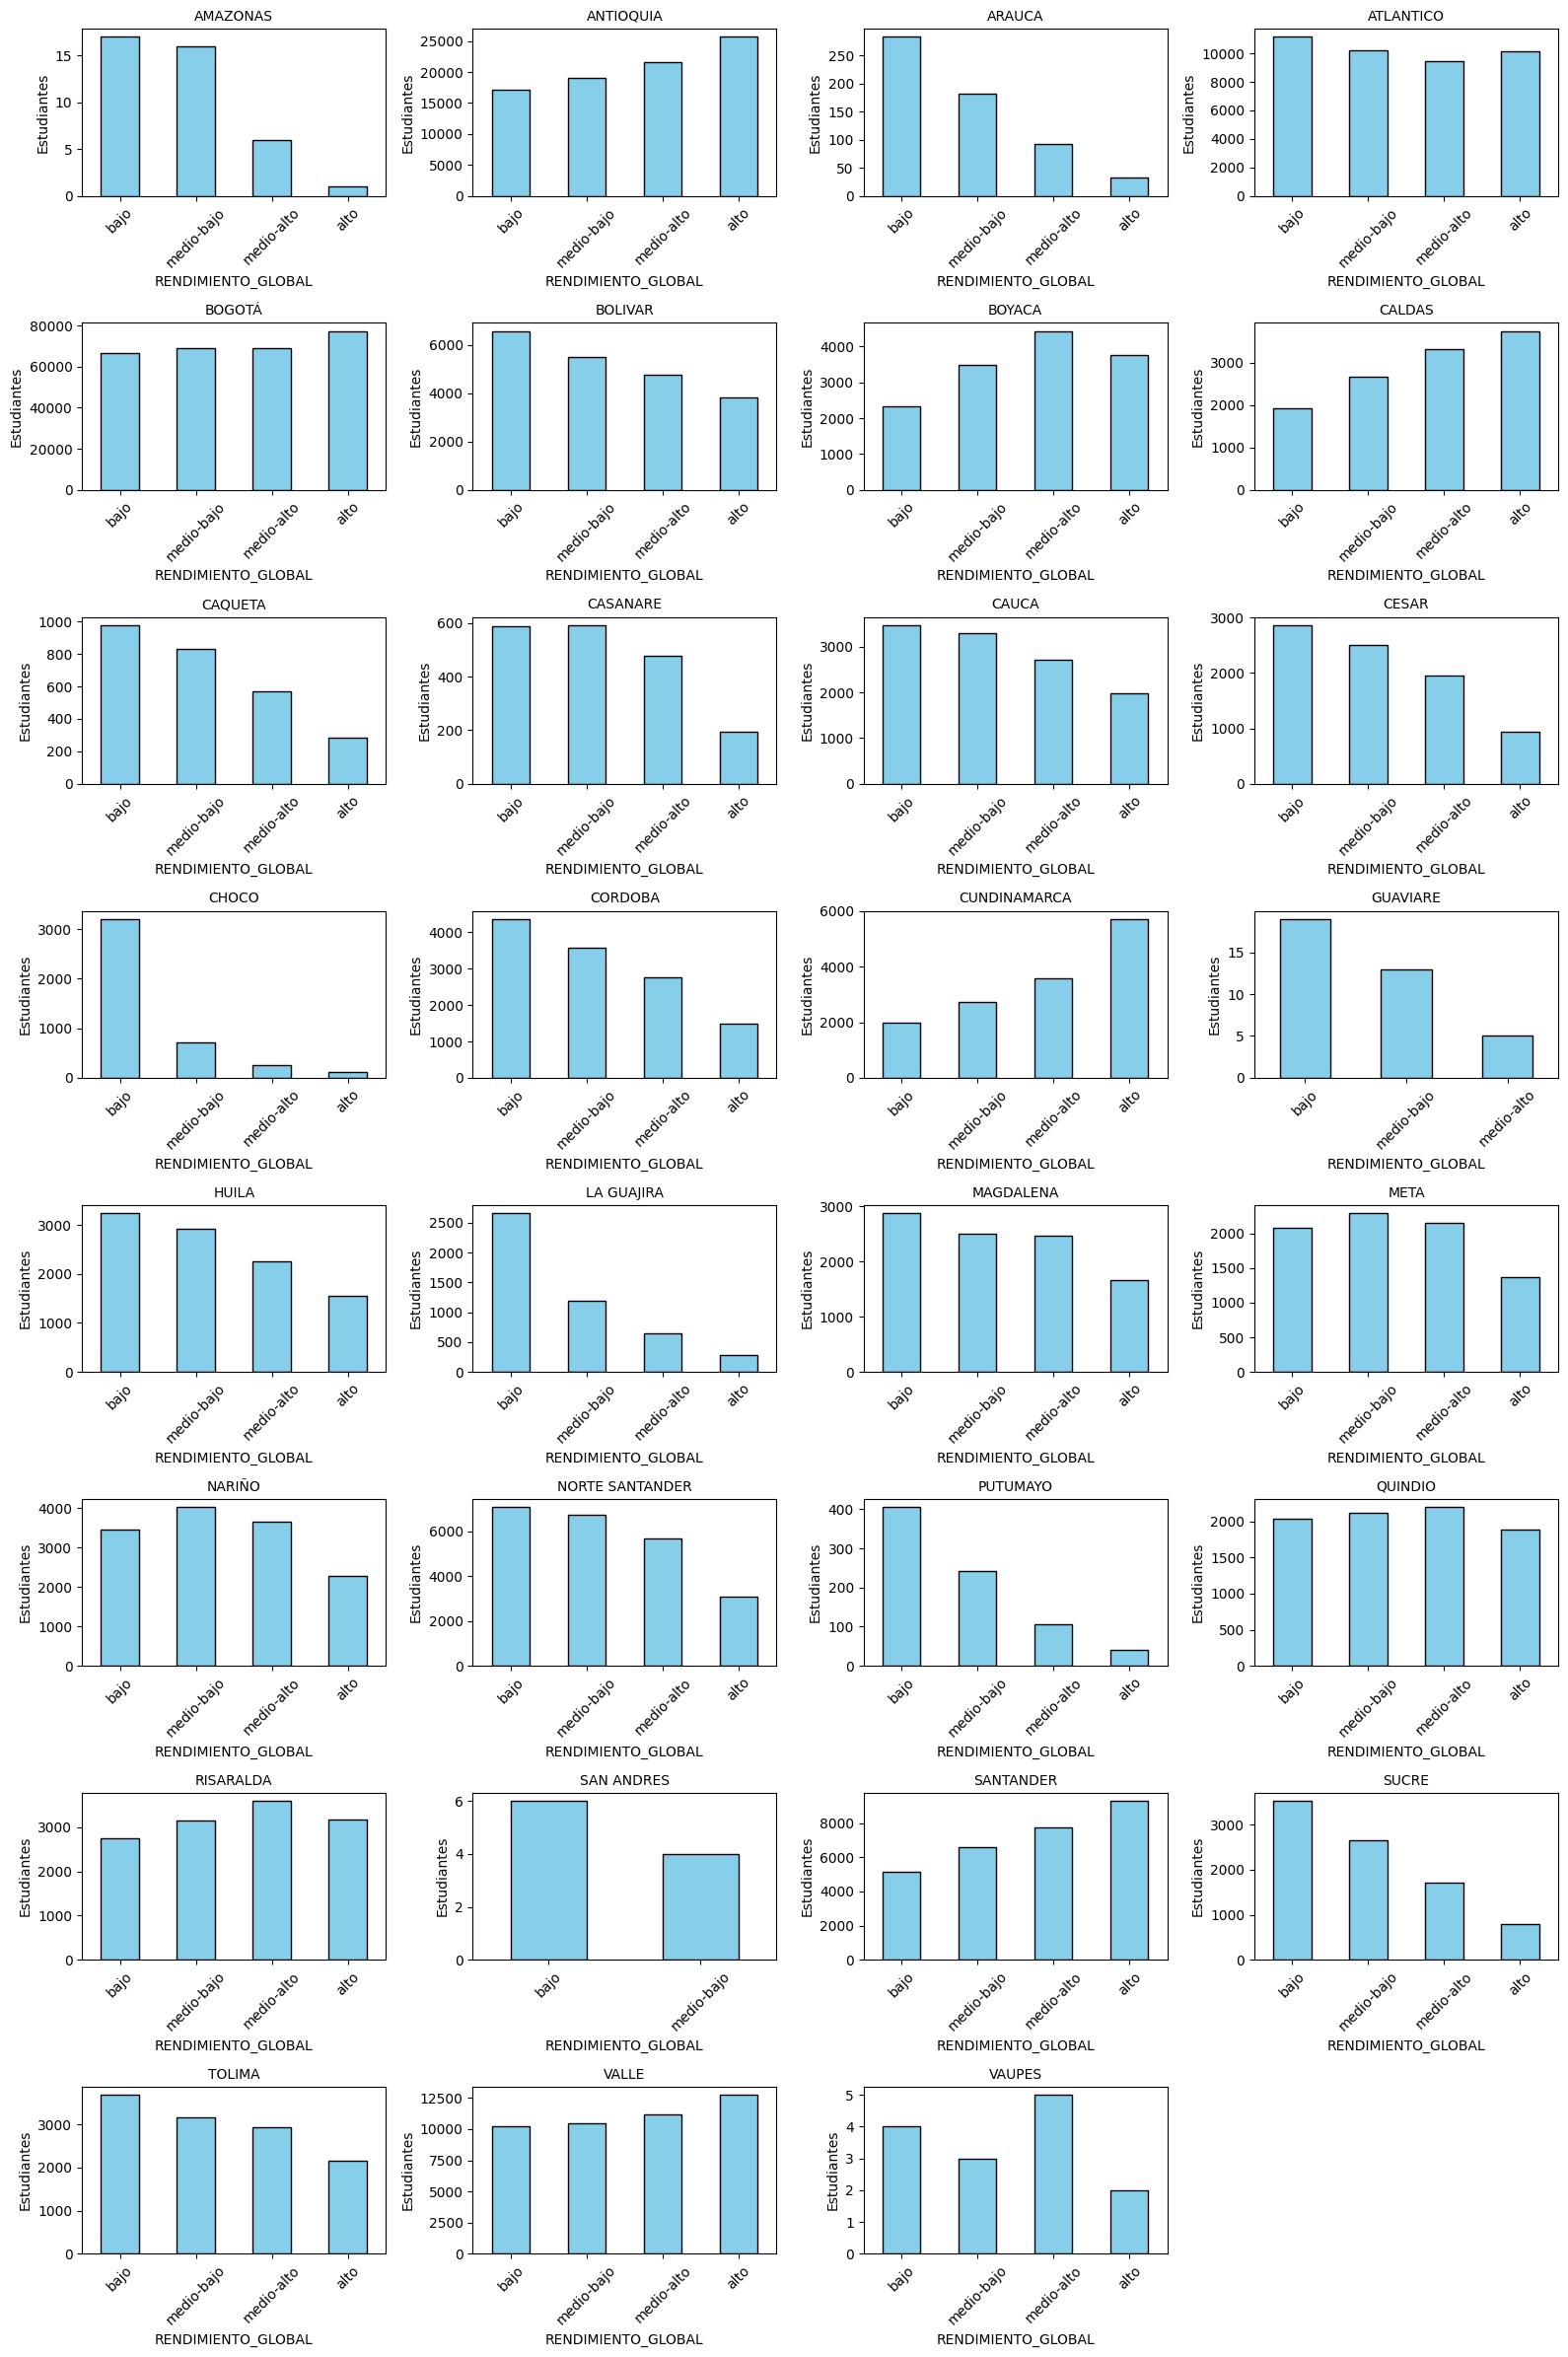

In [16]:
#exploracion multigrafico
#Comparar la relacion de los estudiantes con su rendimiento global

c = sorted(z.ESTU_PRGM_DEPARTAMENTO.value_counts().index)

for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_PRGM_DEPARTAMENTO==ci]
    counts = zc.RENDIMIENTO_GLOBAL.value_counts()

    required_values = ['bajo', 'medio-bajo', 'medio-alto', 'alto']
    existing_values = [val for val in required_values if val in counts.index]

    counts = counts[existing_values]
    counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

    ax.set_title(ci, fontsize=10)
    ax.set_ylabel('Estudiantes')
    ax.set_xticklabels(counts.index, rotation=45)

plt.tight_layout()
plt.show()


<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

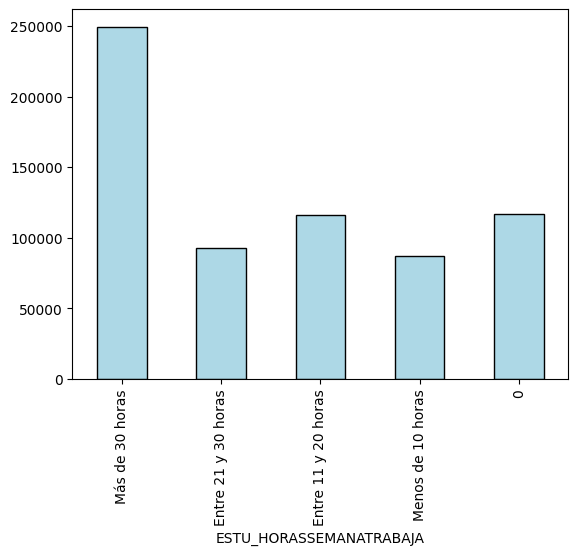

In [18]:
#Estudiantes que trabajan#

horas = [
    "Más de 30 horas",
    "Entre 21 y 30 horas",
    "Entre 11 y 20 horas",
    "Menos de 10 horas",
    "0"

]

z.ESTU_HORASSEMANATRABAJA.value_counts().reindex(horas).plot(kind='bar', color='lightblue', edgecolor='black')



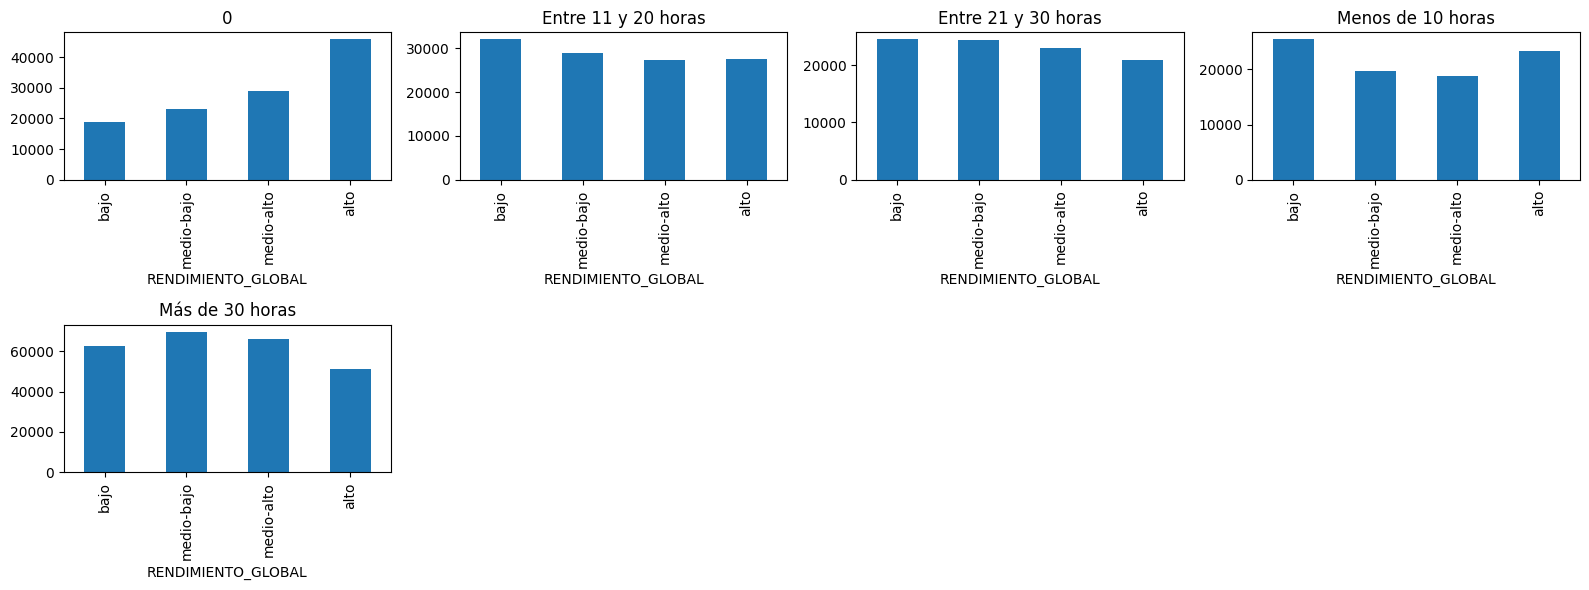

In [19]:
c = sorted(z.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

Se puede concluir que los estudiantes que no trabajan tiene un mayor rendimiento global a comparacion de los estudiantes que si trabajan

In [20]:
##Numero de estudiantes por estrato##
estudiantes_estrato = z.groupby('FAMI_ESTRATOVIVIENDA').size()
estudiantes_estrato

,0
FAMI_ESTRATOVIVIENDA,
Estrato 1,111991
Estrato 2,232671
Estrato 3,210685
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [21]:
##Numero de estudiantes que pagaron su matricula##
estudiantes_pagomatr = z.groupby('ESTU_PAGOMATRICULAPROPIO').size()
estudiantes_pagomatr

,0
ESTU_PAGOMATRICULAPROPIO,
No,382201
Si,303801


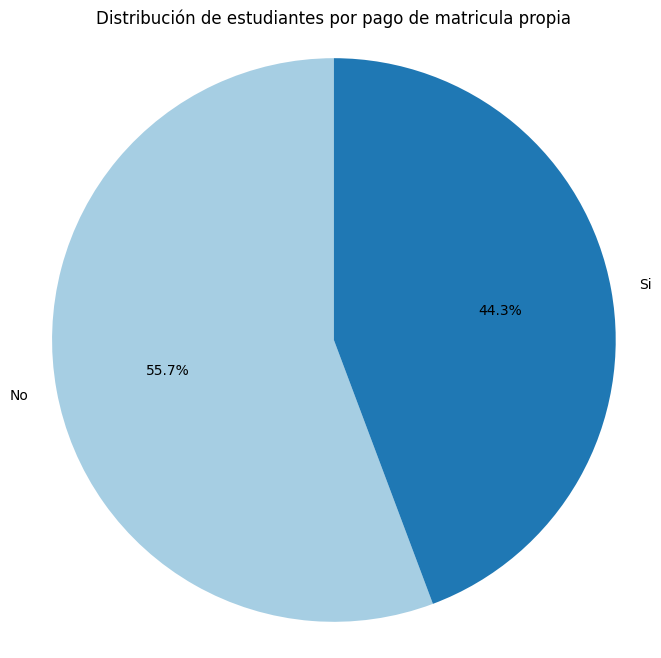

In [23]:
plt.figure(figsize=(8,8))
plt.pie(estudiantes_pagomatr, labels=estudiantes_pagomatr.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Distribución de estudiantes por pago de matricula propia')

plt.axis('equal')

plt.show()